# Usiminas: Residência em Ciência de Dados

**Disciplina:** Probabilidade e Análise de Dados com Python

**Professores:** Flávio Figueiredo e Pedro Melo

**Aula 6:** Análise exploratória de dados e visualizações com Seaborn e Plotly 

Na aula de hoje, vimos como construir diversos tipos de visualizações utilizando as bibliotecas `seaborn`e `plotly`. Aqui, colocaremos em prática o que aprendemos para gerar e analisar visualizações com essas ferramentas.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Questão 1 - Reconstrua o gráfico de pontos mostrado abaixo.

![img1](https://github.com/fccarvalho2/Viz/blob/main/graph.png?raw=true)

**Informações adicionais:** Para este plot, utilizaremos somente os diamantes da melhor classe de cores (D) do conjunto de dados "Diamonds", que já está incluindo na bibloteca `seaborn`. Você precisará utilizar as funções da biblioteca `pandas` para selecionar as linhas que atendem a este critério. Lembre-se de escolher dimensões apropriadas para sua figura.

In [28]:
#Importando e visualizando o conjunto de dados
diamonds = sns.load_dataset('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


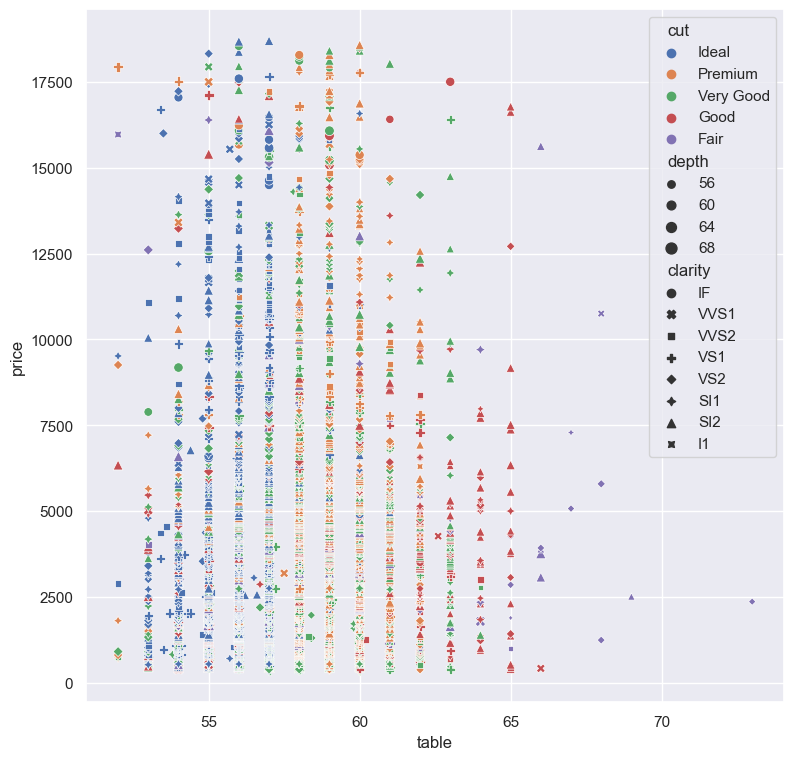

In [29]:
q1 = diamonds.query("color == 'D'")
sns.scatterplot(data=q1, x="table", y="price", hue="cut", style="clarity", size="depth")
sns.set(rc = {'figure.figsize':(9,9)})

**Pergunta:** Analisando a figura, qual par de variáveis (dentre as mostradas) parece estar mais fortemente associado?

**Resposta: As variáveis cut e table** 

### Questão 2 - Reconstrua o violin plot a seguir.


![violin plot](https://github.com/fccarvalho2/Viz/blob/main/graph2.png?raw=true)

**Informações adicionais:** Para este plot, utilizaremos o conjunto de dados "tips" em sua totalidade. Este _dataset_ já está incluindo por padrão na bibloteca `seaborn` e pode ser importado como um dataframe `pandas` utilizando o comando `sns.load_dataset('tips')`.

In [30]:
#Importando e visualizando o conjunto de dados
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='day', ylabel='tip'>

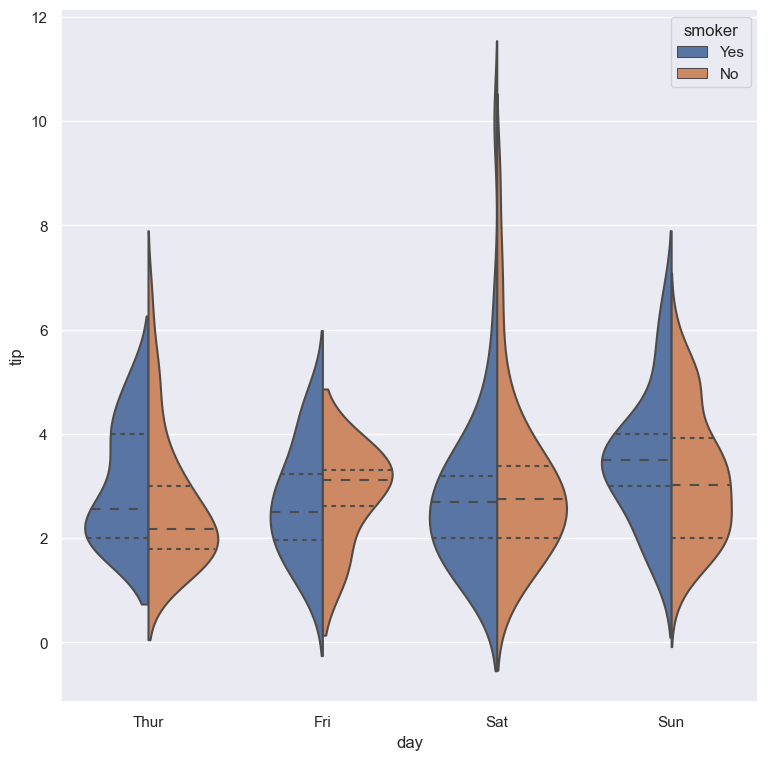

In [31]:
sns.violinplot(data=tips, x="day", y="tip", hue="smoker", split=True, inner="quartile")

Analisando a visualização construída, podemos obter as respostas para algumas perguntas, incluindo, mas não limitando-se a:

1. Fumantes (_smoker_=_Yes_) tendem a pagar melhores gorgetas?
2. Em qual dia da semana as gorgetas são melhores?
3. Em qual dia da semana se observou a maior gorgeta? 

Com base nisso, modifique a visualização acima para responder às seguintes perguntas:

1. Há uma diferença significativa no total das contas (_total_bill_) pagos por homens e mulheres?
2. Os clientes tendem a gastar mais no almoço ou no jantar?

<Axes: xlabel='time', ylabel='total_bill'>

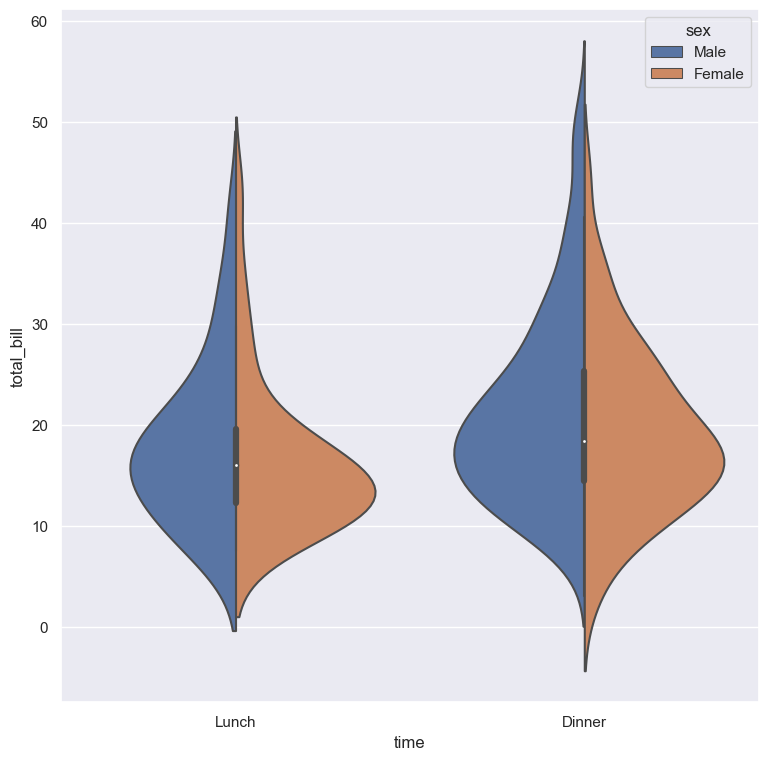

In [32]:
sns.violinplot(data=tips, x="time", y="total_bill", hue="sex", split=True)

### Questão 3 - Construa um  mapa de calor utilizando o conjunto de dados _diamonds_.

**Informações adicionais:** Conjunto de dados muito grandes podem dificultar a criação de visualizações efetivas. Este é o caso do conjunto diamonds, que possui mais de 53 mil entradas. Para situações como esta, a análise de informações estatísticas (como as correlações) dos dados é muito importante durante a etapa de análise exploratória dos dados, e nos ajuda a criar visualizações mais eficientes. Utilizando as bibliotecas `pandas` e `seaborn`, constura um mapa de calor representando as correlações entre as diversas variáveis numéricas deste conjunto de dados.


In [34]:
sns.heatmap(data=diamonds.corr())

ValueError: could not convert string to float: 'Ideal'

**a)** Construa agora uma matriz de _scatterplots_. Qual destas visualizações lhe parece mais efetiva?

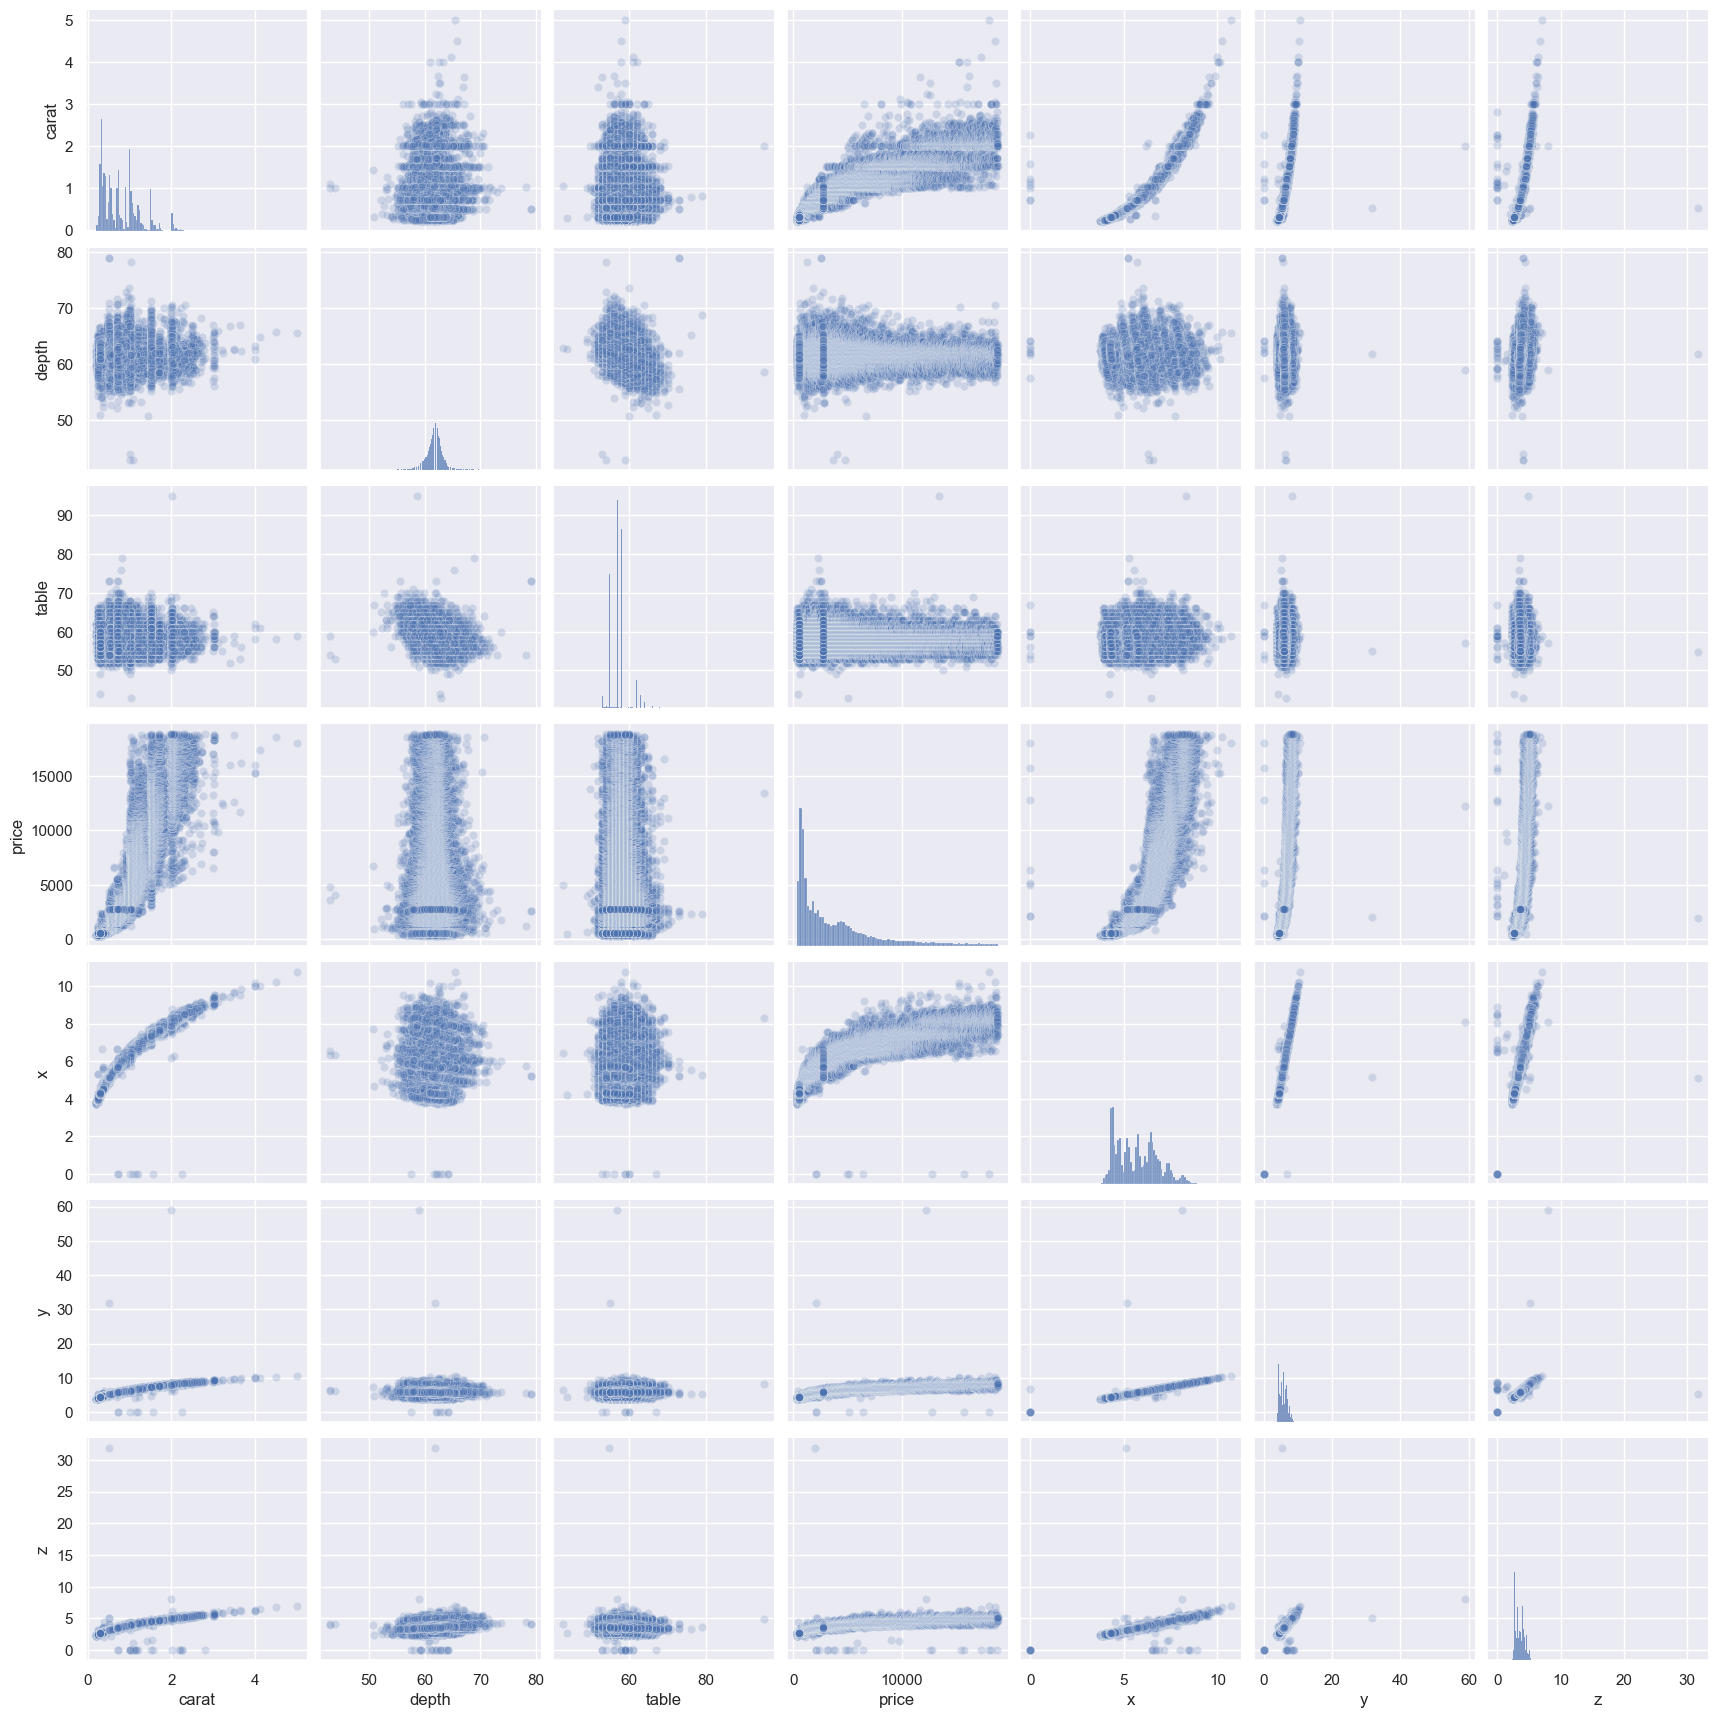

In [ ]:
q3a = sns.pairplot(data=diamonds,plot_kws={'alpha':0.2})

###  Questão 4 [Desafio] - Construindo animações com Plotly

O Gapminder é uma instituição sem afiliações políticas, econômicas ou religiosas, que tem como o objetivo utilizar dados reais para combater a desinformação sistemática sobre diversos aspectos globais importantes como a pobreza e desigualdades sociais. No [site da organização](https://www.gapminder.org/) são disponibilizados diversos recursos como visualizações criativas, quizes, conjuntos de dados de grande utilidade pública, dentre outros.

Uma das visualizações mais famosas criadas e divulgadas pelo Gapminder é o [Bubble chart animado](https://www.gapminder.org/tools/#$chart-type=bubbles&url=v1) que mostra como a renda e a expectativa de vida mudaram ao redor do mundo desde desde o final do século XVIII.

Apesar de bastante impactante e visualmente atraente, esta visualização de aparência complexa é mais fácil de se construir do que inicialmente podemos imaginar. Por isso, propomos aqui o desafio de reconstruir a animação utilizando os dados do gapminder e a biblioteca `plotly`. 

Observação: No gráfico mostrado no Gapminder, o eixo x está em escala logaritmica. Podemos conseguir resultados similares utilizando o parâmetro `log_x=True` na chamada de nossa função. Para ajustar o tamanho do eixo y, podemos usar ` range_y=[15,90]`.

In [35]:
#Importando e visualizando o conjunto de dados
gapminder = px.data.gapminder()
gapminder

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716
